In [86]:
# !pip install seaborn

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
%matplotlib inline
# pd.set_option('display.max_rows', None)

In [89]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Data

In [91]:
train.head().isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [92]:
# Checking NULL values in each column
print("NULL count\n")
print(train.isnull().sum()) # count of NULLs
print("\n NULL in terms of %age")
print(train.isnull().sum()/len(train)*100) # Null values as %age

NULL count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 NULL in terms of %age
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


<Axes: >

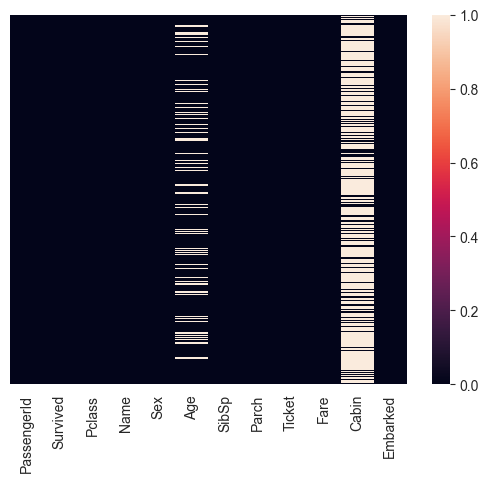

In [93]:
sns.heatmap(train.isnull(), # provide the data i.e the df with T/F for NULL values
            yticklabels=False, # do not show the index numbers on y-axis
            )

All the NULL values are deemed as TRUE[1] and non-null values are FALSE[0].  
Based on the above chart, there are a lot of missing values in 'Age'[20%] and 'Cabin'[77%] columns.  
'Embarked' column also seem to have very few NULLs.



<Axes: xlabel='Survived', ylabel='count'>

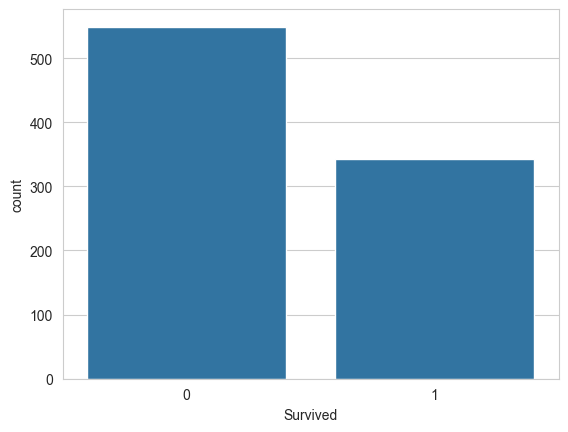

In [94]:
# checking distrbution of Dependent column - Survived
sns.set_style('whitegrid')
sns.countplot(data=train, # pass the df
              x = 'Survived', # column name for which count plot is being created
            #   stat='percent', # optional - gives the count in terms of %age rather than numbers
            #   order=[1,0] # optional - order to plot the categotical variables
              )

The distribution seems to be 60:40 w.r.t not_survived:survived

<Axes: xlabel='Survived', ylabel='count'>

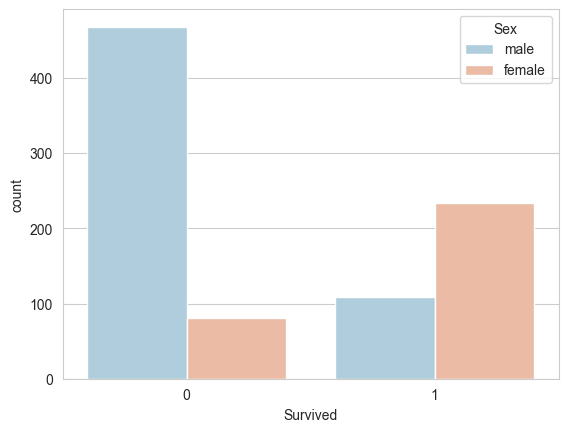

In [95]:
sns.set_style('whitegrid')
sns.countplot(data=train,
              x='Survived',
              hue='Sex',
              palette='RdBu_r'
              )

The above makes sense that more Females survived than Males, since women and children were saved first.

<Axes: xlabel='Survived', ylabel='count'>

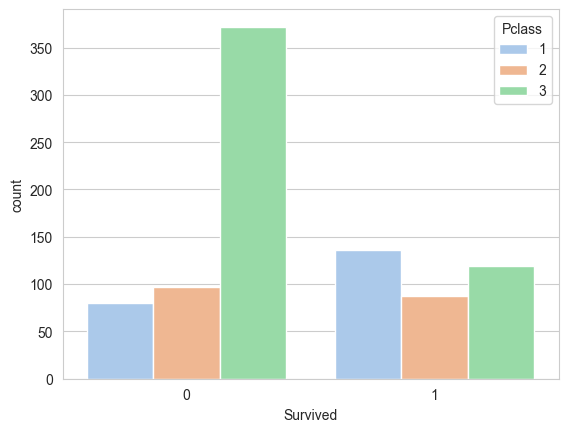

In [96]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', hue='Pclass', palette='pastel')

More people survived than died who were in First class.

Also, when looking at people who were in 3rd class, 75% of them died.


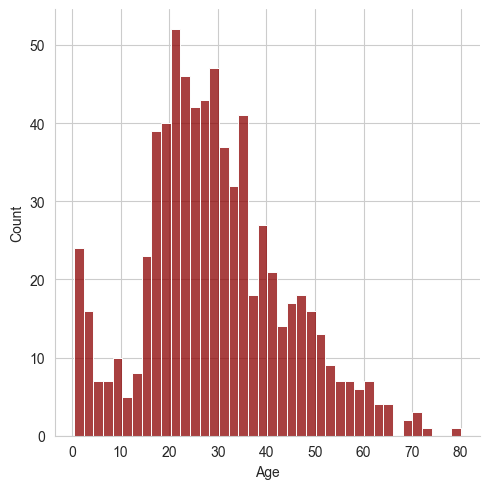

In [97]:
sns.set_style('whitegrid')
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

Text(0.5, 1.0, 'Age Distribution - Not Survived')

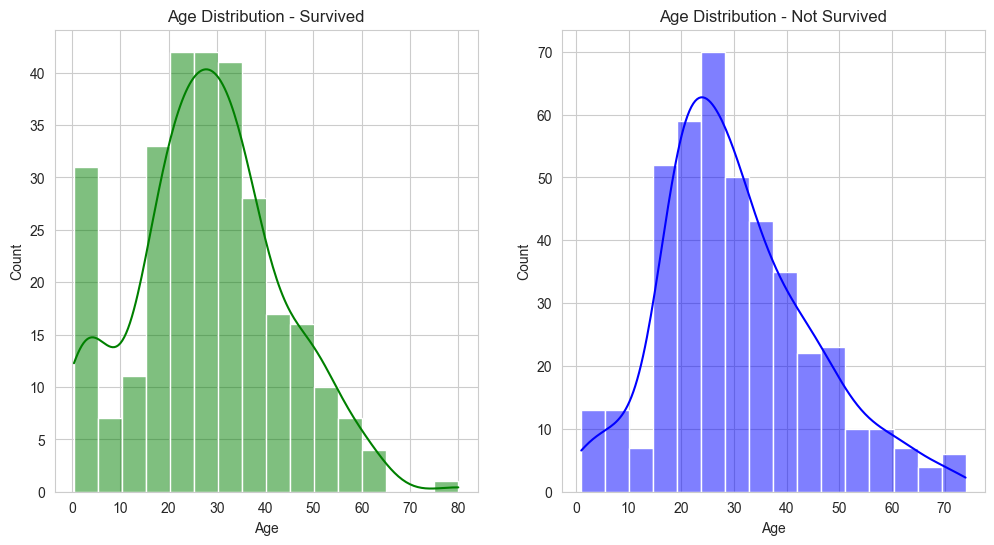

In [98]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Age distribution of those who survived
sns.histplot(train[train['Survived']== 1]['Age'], color='green', ax = axes[0], kde=True)
axes[0].set_title('Age Distribution - Survived')

# Age distribution of those who did not survive
sns.histplot(train[train['Survived']==0]['Age'], color='blue', ax = axes[1], kde=True)
axes[1].set_title('Age Distribution - Not Survived')

<Axes: xlabel='SibSp', ylabel='count'>

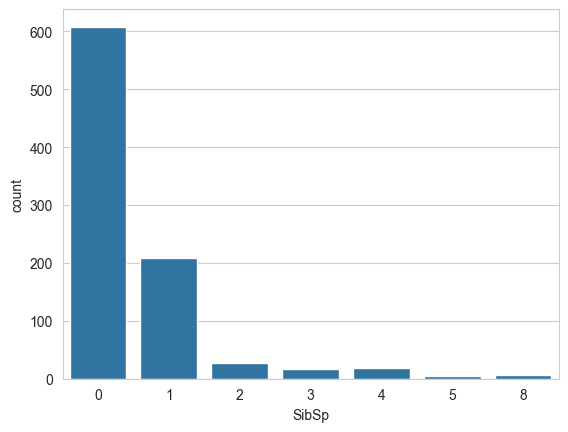

In [99]:
# Frequency of Sibling/Spouse
sns.set_style('whitegrid')
sns.countplot(data=train, x='SibSp')#, hue='Sex')

<Axes: >

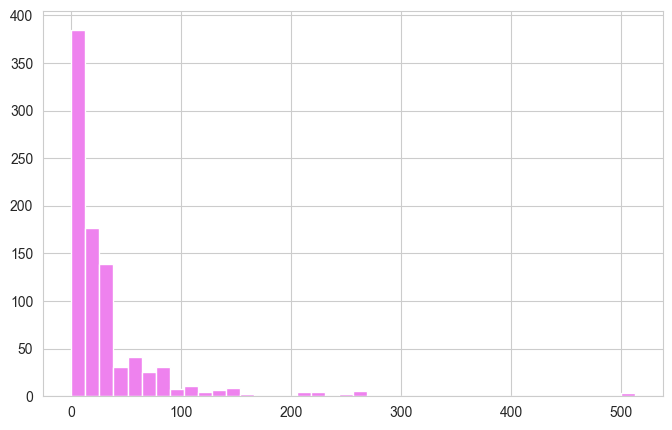

In [100]:
train['Fare'].hist(color='violet', bins=40, figsize=(8,5))

## Data Cleaning
Trying to fill the missing data instead of just dropping them.

<Axes: xlabel='Pclass', ylabel='Age'>

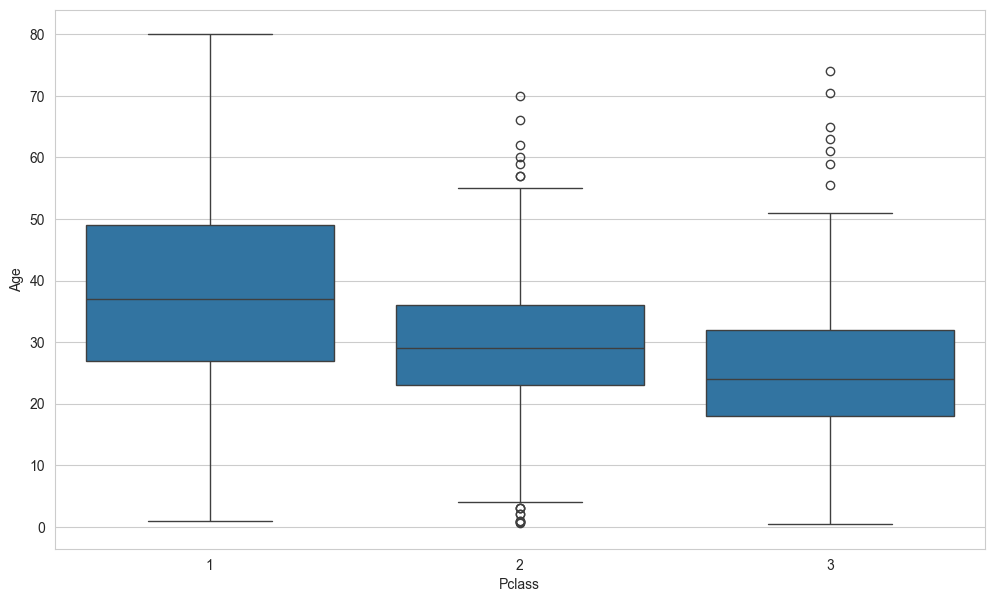

In [101]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train)

Based on the above box-plots, we can impute age variable based on Pclass column i.e. Average age for each Pclass as the imputing value for the missing values of that Pclass

In [102]:
pclass_1_mean_age = round(train[train['Pclass']==1]['Age'].mean(),0)
pclass_2_mean_age = round(train[train['Pclass']==2]['Age'].mean(),0)
pclass_3_mean_age = round(train[train['Pclass']==3]['Age'].mean(),0)
print(pclass_1_mean_age,pclass_2_mean_age,pclass_3_mean_age)

38.0 30.0 25.0


In [103]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return pclass_1_mean_age
        elif Pclass == 2:
            return pclass_2_mean_age
        else:
            return pclass_3_mean_age
    else:
        return Age

In [104]:
# Applying the above function
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

C:\Users\Vibhanshu\AppData\Local\Temp\ipykernel_13496\1697732438.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Vibhanshu\AppData\Local\Temp\ipykernel_13496\1697732438.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

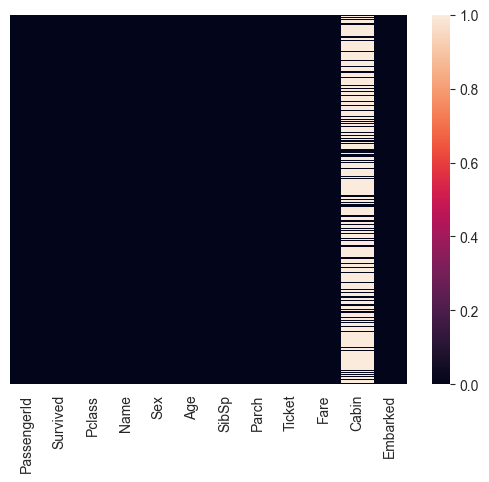

In [105]:
#  Checking the heatmap again
sns.heatmap(train.isnull(), # provide the data i.e the df with T/F for NULL values
            yticklabels=False, # do not show the index numbers on y-axis
            )

In [106]:
# Dropping the 'Cabin' column since around 80% of the values are NULL
train.drop('Cabin', inplace=True, axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features

In [107]:
sex = pd.get_dummies(train['Sex'], drop_first=True) # drop_first=True drops the first column as we can use the rest of the columns 
# to get that information. For e.g if there are 3 categories and we drop 1 of them. Now, if we find that 2 of the columns are 0 it
# means that the first column was 1. This just helps in managing the columns in a better way
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [108]:
# Dropping the categorical and ID columns from the original dataset
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [109]:
# Adding the converted categorical columns now
train = pd.concat([train,sex,embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## Building a Logistic Regression Model

#### Train-Test Split

In [110]:
train.drop('Survived', axis=1).head() # Independent Variables
train['Survived'].head() # Dependent variables

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [111]:
# !pip install scikit-learn

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=11)

### Training and Predicting

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression(max_iter=1000)
# logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [116]:
predictions = logmodel.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[161,  15],
       [ 24,  68]], dtype=int64)

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
accuracy_sc = accuracy_score(y_test, predictions)
accuracy_sc

0.8544776119402985

In [121]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [122]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[159,  17],
       [ 24,  68]], dtype=int64)

In [123]:
accuracy_sc = accuracy_score(y_test, predictions)
accuracy_sc

0.8470149253731343